# Exploring taxonomic incoherence of GTDB

In [1]:
import sourmash
from sourmash.lca import lca_utils
from collections import defaultdict, Counter
import math
import pandas as pd

In [3]:
db = sourmash.load_file_as_index('gtdb-rs207.genomic.k31.sqldb')

In [4]:
db

In [5]:
print(len(db))

317542


In [6]:
def calc_entropy(lineages, *, rank='species'):
    cnt = Counter()
    for lin in lineages:
        while lin[-1].rank != rank:
            lin = lin[:-1]
        cnt[lin] += 1
        
    total = sum(cnt.values())
    H = 0
    for v in cnt.values():
        p = v / total
        H -= p * math.log(p, 2)
        
    return H

In [7]:
assignments = {}

xx = []

for n, hashval in enumerate(db.hashvals):
    if n % 100000 == 0:
        print('...', n)
    lineages = db.get_lineage_assignments(hashval)
    cnt = Counter(lineages)
    #print(cnt, sum(cnt.values()))
    
    total = sum(cnt.values())
    H = 0
    for v in cnt.values():
        p = v / total
        H -= p * math.log(p, 2)
   
    xx.append(dict(hashval=hashval, H=H))

... 0
... 100000
... 200000
... 300000
... 400000
... 500000
... 600000
... 700000
... 800000
... 900000
... 1000000
... 1100000
... 1200000
... 1300000
... 1400000
... 1500000
... 1600000
... 1700000
... 1800000
... 1900000
... 2000000
... 2100000
... 2200000
... 2300000
... 2400000
... 2500000
... 2600000
... 2700000
... 2800000
... 2900000
... 3000000
... 3100000
... 3200000
... 3300000
... 3400000
... 3500000
... 3600000
... 3700000
... 3800000
... 3900000
... 4000000
... 4100000
... 4200000
... 4300000
... 4400000
... 4500000
... 4600000
... 4700000
... 4800000
... 4900000
... 5000000
... 5100000
... 5200000
... 5300000
... 5400000
... 5500000
... 5600000
... 5700000
... 5800000
... 5900000
... 6000000
... 6100000
... 6200000
... 6300000
... 6400000
... 6500000
... 6600000
... 6700000
... 6800000
... 6900000
... 7000000
... 7100000
... 7200000
... 7300000
... 7400000
... 7500000
... 7600000
... 7700000
... 7800000
... 7900000
... 8000000
... 8100000
... 8200000
... 8300000
... 840

In [8]:
species_df = pd.DataFrame(xx)


In [9]:
num_h0 = len(species_df[species_df.H == 0.0])
nonzero_df = species_df[species_df.H > 0.0]
total = len(species_df)

print(f"{num_h0} of {total} hashvals ({num_h0 / total * 100:.1f}%) are perfectly informative at species level!")

21150287 of 22792206 hashvals (92.8%) are perfectly informative at species level!


In [10]:
len(nonzero_df)

1641919

In [11]:
hashvals = set(nonzero_df.hashval)

In [12]:
len(hashvals)

1641919

In [13]:
zz = []
for n, hashval in enumerate(hashvals):
    if n % 100000 == 0:
        print('...', n)
        #if n > 0:        break
    lineages = db.get_lineage_assignments(hashval)
    
    H = calc_entropy(lineages, rank='genus')
    
    zz.append(dict(hashval=hashval, H=H))

... 0
... 100000
... 200000
... 300000
... 400000
... 500000
... 600000
... 700000
... 800000
... 900000
... 1000000
... 1100000
... 1200000
... 1300000
... 1400000
... 1500000
... 1600000


In [14]:
genus_df = pd.DataFrame(zz)

genus_num_h0 = len(genus_df[genus_df.H == 0.0])
genus_nonzero_df = genus_df[genus_df.H > 0.0]
genus_total = len(genus_df)

print(f"{genus_num_h0} of {genus_total} hashvals ({genus_num_h0 / genus_total * 100:.1f}%) are perfectly informative at genus level!")

1262281 of 1641919 hashvals (76.9%) are perfectly informative at genus level!


In [15]:
len(genus_nonzero_df)

379638

In [16]:
1262281 + 379638

1641919

In [17]:
379638 / 22792206

0.016656483361022625

In [18]:
zz2 = []
for n, hashval in enumerate(genus_nonzero_df.hashval):
    if n % 100000 == 0:
        print('...', n)
        #if n > 0:        break
    lineages = db.get_lineage_assignments(hashval)
    
    H = calc_entropy(lineages, rank='family')
    
    zz2.append(dict(hashval=hashval, H=H))

... 0
... 100000
... 200000
... 300000


In [19]:
family_df = pd.DataFrame(zz2)

family_num_h0 = len(family_df[family_df.H == 0.0])
family_nonzero_df = family_df[family_df.H > 0.0]
family_total = len(family_df)

print(f"{family_num_h0} of {family_total} hashvals ({family_num_h0 / family_total * 100:.1f}%) are perfectly informative at family level!")

170249 of 379638 hashvals (44.8%) are perfectly informative at family level!


In [20]:
len(family_nonzero_df)

209389

In [21]:
209389 / 22792206

0.00918686852865405

## can we look at the actual H values to figure stuff out?

H <= 1 implies that there are two or fewer taxonomic results.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt


(array([6.8900e+03, 3.2840e+03, 3.0090e+03, 2.8280e+03, 3.2350e+03,
        3.0950e+03, 3.3750e+03, 4.7940e+03, 2.5770e+03, 6.1640e+03,
        4.7820e+03, 6.6910e+03, 1.0300e+03, 9.7620e+03, 1.5141e+04,
        2.1400e+03, 3.1497e+04, 5.4490e+03, 6.3683e+04, 1.0260e+03,
        1.2270e+03, 5.4300e+02, 1.6940e+03, 1.0400e+03, 2.7100e+03,
        7.5500e+02, 1.5220e+03, 4.5880e+03, 4.8060e+03, 4.8900e+02,
        6.3800e+02, 6.5900e+02, 7.4900e+02, 7.1200e+02, 1.3490e+03,
        4.1700e+02, 1.0020e+03, 2.7300e+02, 4.7000e+02, 2.8200e+02,
        5.3200e+02, 3.2600e+02, 1.8500e+02, 2.5200e+02, 1.6100e+02,
        2.5800e+02, 1.7600e+02, 1.2500e+02, 9.2000e+01, 1.3900e+02,
        8.9000e+01, 9.5000e+01, 8.5000e+01, 6.6000e+01, 5.6000e+01,
        5.0000e+01, 2.7000e+01, 2.9000e+01, 3.0000e+01, 2.3000e+01,
        2.7000e+01, 3.2000e+01, 2.2000e+01, 1.2000e+01, 1.3000e+01,
        1.8000e+01, 9.0000e+00, 1.1000e+01, 1.2000e+01, 8.0000e+00,
        8.0000e+00, 3.0000e+00, 3.0000e+00, 3.00

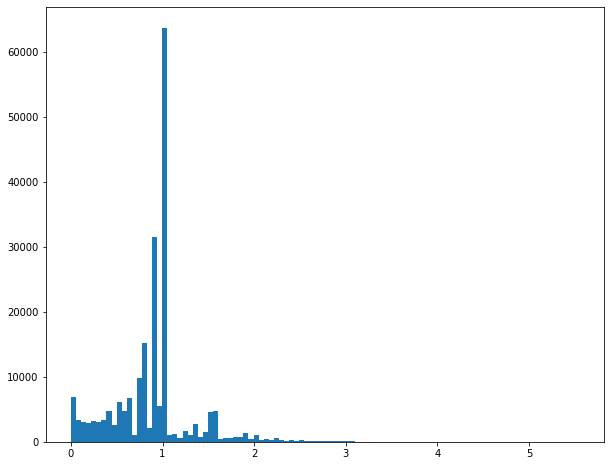

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(family_nonzero_df.H, bins=100)

In [26]:
# detect perfectly balanced hashvals = split between two families.
df_H1 = family_nonzero_df[family_nonzero_df.H == 1.0]

In [27]:
hashval = next(iter(df_H1.hashval))
lineages = db.get_lineage_assignments(hashval)
lineages

[(LineagePair(rank='superkingdom', name='d__Bacteria'),
  LineagePair(rank='phylum', name='p__Actinobacteriota'),
  LineagePair(rank='class', name='c__Thermoleophilia'),
  LineagePair(rank='order', name='o__Gaiellales'),
  LineagePair(rank='family', name='f__Gaiellaceae'),
  LineagePair(rank='genus', name='g__PALSA-600'),
  LineagePair(rank='species', name='s__PALSA-600 sp013821525')),
 (LineagePair(rank='superkingdom', name='d__Bacteria'),
  LineagePair(rank='phylum', name='p__Gemmatimonadota'),
  LineagePair(rank='class', name='c__Gemmatimonadetes'),
  LineagePair(rank='order', name='o__Gemmatimonadales'),
  LineagePair(rank='family', name='f__Gemmatimonadaceae'),
  LineagePair(rank='genus', name='g__FEN-1250'),
  LineagePair(rank='species', name='s__FEN-1250 sp013697785'))]

In [28]:
f"{209389 * 10000:g}"

'2.09389e+09'

## can we track down biggest offending genomes?

In [31]:
idx_count = Counter()
for n, hashval in enumerate(family_nonzero_df.hashval):
    if n % 10000 == 0:
        print('....', n)
    idx_count.update(db.hashval_to_idx[hashval])


.... 0
.... 10000
.... 20000
.... 30000
.... 40000
.... 50000
.... 60000
.... 70000
.... 80000
.... 90000
.... 100000
.... 110000
.... 120000
.... 130000
.... 140000
.... 150000
.... 160000
.... 170000
.... 180000
.... 190000
.... 200000


In [37]:
print(len(idx_count))

306668


In [40]:
print(len(idx_count.most_common()))

306668


In [32]:
idx_count.most_common()[:20]

[(161751, 451),
 (130623, 423),
 (106404, 423),
 (16340, 422),
 (102799, 422),
 (74969, 421),
 (258379, 420),
 (57968, 419),
 (246075, 419),
 (1205, 418),
 (65470, 418),
 (20605, 417),
 (184464, 416),
 (290619, 415),
 (59191, 415),
 (126080, 415),
 (255618, 415),
 (141402, 413),
 (67112, 412),
 (299076, 412)]

(array([5.6384e+04, 2.5987e+04, 2.0647e+04, 1.4340e+04, 1.5227e+04,
        9.4860e+03, 8.9440e+03, 7.2040e+03, 8.1010e+03, 5.2850e+03,
        6.5680e+03, 4.4980e+03, 3.5170e+03, 2.4440e+03, 1.9290e+03,
        1.7340e+03, 3.3990e+03, 1.7610e+03, 1.5720e+03, 1.7280e+03,
        1.6230e+03, 8.7600e+02, 1.4440e+03, 1.4820e+03, 3.4920e+03,
        2.9150e+03, 2.8400e+03, 2.1470e+03, 2.3090e+03, 4.8340e+03,
        8.5460e+03, 4.5960e+03, 2.9470e+03, 8.0700e+02, 7.5400e+02,
        7.6700e+02, 5.7300e+02, 4.6600e+02, 5.6700e+02, 9.4800e+02,
        7.9400e+02, 1.1950e+03, 5.5700e+02, 5.5000e+02, 9.8500e+02,
        1.1910e+03, 3.1980e+03, 2.1590e+03, 2.0900e+03, 5.2200e+02,
        1.9600e+02, 1.8500e+02, 2.1800e+02, 3.1100e+02, 6.2000e+02,
        9.6200e+02, 1.6160e+03, 1.9310e+03, 2.9490e+03, 2.5560e+03,
        3.0910e+03, 2.6250e+03, 2.4140e+03, 1.5070e+03, 2.0280e+03,
        1.6580e+03, 1.4320e+03, 8.9400e+02, 5.5900e+02, 2.2400e+02,
        2.8500e+02, 3.8200e+02, 6.2600e+02, 9.81

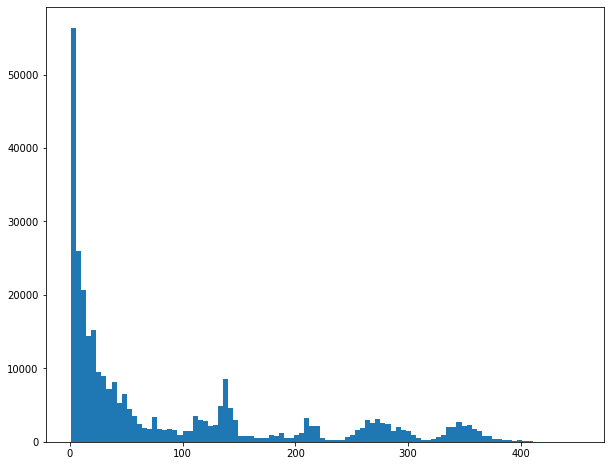

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))

counts = [ v for k, v in idx_count.most_common() ]

ax.hist(counts, bins=100)

In [48]:
idx_most = []
for k, v in idx_count.most_common():
    if v < 100:
        break
    idx_most.append((k, v))

In [49]:
len(idx_most)

103414

In [33]:
for (idx_val, count) in idx_count.most_common()[:10]:
    print(idx.idx_to_ident[idx_val])

GCA_001894475
GCF_001374035
GCF_002135965
GCF_001374135
GCF_018551555
GCF_000794885
GCF_001374095
GCF_009600645
GCF_000794905
GCF_000478465


## can we track down biggest offending genomes, mark 2

tl;dr use gather

In [34]:
print(len(family_nonzero_df))

209389


In [35]:
mh = next(iter(idx.signatures())).minhash.copy_and_clear()
print(mh)

mh.add_many(list(family_nonzero_df.hashval))
print(len(mh))

query_ss = sourmash.SourmashSignature(mh)
with open('gtdb.family_confused.sig.gz', 'wb') as fp:
    sourmash.save_signatures([query_ss], fp, compression=1)

209389


## can we determine worst case scenario?

what are pairs of genomes that most confound taxonomy?



In [51]:
print(len(idx_most))

103414


In [50]:
idx_most[:20]

[(161751, 451),
 (130623, 423),
 (106404, 423),
 (16340, 422),
 (102799, 422),
 (74969, 421),
 (258379, 420),
 (57968, 419),
 (246075, 419),
 (1205, 418),
 (65470, 418),
 (20605, 417),
 (184464, 416),
 (290619, 415),
 (59191, 415),
 (126080, 415),
 (255618, 415),
 (141402, 413),
 (67112, 412),
 (299076, 412)]

In [52]:
zz4 = []
for n, hashval in enumerate(family_nonzero_df.hashval):
    if n % 100000 == 0:
        print('...', n)
        #if n > 0:        break
    lineages = db.get_lineage_assignments(hashval)
    
    H = calc_entropy(lineages, rank='superkingdom')
    
    zz4.append(dict(hashval=hashval, H=H))

... 0
... 100000
... 200000


In [53]:
superkingdom_df = pd.DataFrame(zz4)

superkingdom_num_h0 = len(superkingdom_df[superkingdom_df.H == 0.0])
superkingdom_nonzero_df = superkingdom_df[superkingdom_df.H > 0.0]
superkingdom_total = len(superkingdom_df)

print(f"{superkingdom_num_h0} of {superkingdom_total} hashvals ({superkingdom_num_h0 / superkingdom_total * 100:.1f}%) are perfectly informative at superkingdom level!")

205750 of 209389 hashvals (98.3%) are perfectly informative at superkingdom level!


In [54]:
idx_count2 = Counter()
for n, hashval in enumerate(superkingdom_nonzero_df.hashval):
    if n % 10000 == 0:
        print('....', n)
    idx_count2.update(db.hashval_to_idx[hashval])


.... 0


In [55]:
idx_count2.most_common()


[(189431, 54),
 (36182, 53),
 (280139, 51),
 (166383, 45),
 (18254, 37),
 (12253, 36),
 (108645, 33),
 (162513, 32),
 (181065, 32),
 (217525, 31),
 (259700, 30),
 (212286, 30),
 (43430, 29),
 (278925, 28),
 (6623, 28),
 (265144, 27),
 (61303, 26),
 (250345, 26),
 (280198, 26),
 (3236, 25),
 (299722, 25),
 (51189, 24),
 (94973, 24),
 (10971, 24),
 (40024, 24),
 (190248, 24),
 (126610, 23),
 (278322, 23),
 (308982, 21),
 (207175, 21),
 (235090, 21),
 (28820, 20),
 (245064, 20),
 (171474, 20),
 (51698, 19),
 (21915, 19),
 (58804, 19),
 (305705, 19),
 (226574, 18),
 (72624, 18),
 (139524, 18),
 (127999, 18),
 (232926, 18),
 (22743, 18),
 (80847, 17),
 (313535, 17),
 (315304, 17),
 (303634, 17),
 (85639, 17),
 (295737, 17),
 (213485, 17),
 (69501, 17),
 (10835, 17),
 (78423, 17),
 (85877, 17),
 (88736, 17),
 (186420, 17),
 (211738, 17),
 (58214, 16),
 (141167, 16),
 (173685, 16),
 (148771, 16),
 (67642, 16),
 (85383, 16),
 (100127, 16),
 (156555, 16),
 (71288, 16),
 (2450, 16),
 (36269, 16)

In [56]:
zaza = []
for n, hashval in enumerate(superkingdom_nonzero_df.hashval):
    if n % 10000 == 0:
        print('....', n)
    if 189431 in db.hashval_to_idx[hashval]:
        zaza.append(hashval)

mh = next(iter(idx.signatures())).minhash.copy_and_clear()
print(mh)

mh.add_many(list(zaza))
print(len(mh))

query_ss = sourmash.SourmashSignature(mh)
with open('zaza.sig.gz', 'wb') as fp:
    sourmash.save_signatures([query_ss], fp, compression=1)

.... 0
54


## can we determine worst case scenario? mark 2

what’s the longest run possible from a genome that leaves you in doubt as to what taxonomic unit it belongs to, for any given taxonomic level?

In [81]:
# how many hashvals for each idx
idx_count = Counter()

# idx => hashvals that have H > 0
idx_to_hashvals = defaultdict(set)

# count of LCAs of hashvals
lca_count = Counter()

# hashval -> LCA
hashval_to_lca = {}

for n, hashval in enumerate(family_nonzero_df.hashval):
    if n % 10000 == 0:
        print('....', n)
    idxlist = db.hashval_to_idx[hashval]
    idx_count.update(idxlist)
    for idx in idxlist:
        idx_to_hashvals[idx].add(hashval)
        
    lineages = db.get_lineage_assignments(hashval)
    tree = lca_utils.build_tree(lineages)
    lca, _ = lca_utils.find_lca(tree)
    
    hashval_to_lca[hashval] = lca    
    lca_count[lca] += 1


.... 0
.... 10000
.... 20000
.... 30000
.... 40000
.... 50000
.... 60000
.... 70000
.... 80000
.... 90000
.... 100000
.... 110000
.... 120000
.... 130000
.... 140000
.... 150000
.... 160000
.... 170000
.... 180000
.... 190000
.... 200000


In [80]:
# across all of the hashvals, what's the largest idx? a greedy way of assigning.
max_idx_size = defaultdict(int)

for n, hashval in enumerate(family_nonzero_df.hashval):
    if n % 10000 == 0:
        print('....', n)
    idxlist = db.hashval_to_idx[hashval]
    for idx in idxlist:
        max_idx_size[hashval] = max(max_idx_size[hashval], len(idx_to_hashvals[idx]))


.... 0
.... 10000
.... 20000
.... 30000
.... 40000
.... 50000
.... 60000
.... 70000
.... 80000
.... 90000
.... 100000
.... 110000
.... 120000
.... 130000
.... 140000
.... 150000
.... 160000
.... 170000
.... 180000
.... 190000
.... 200000


In [86]:
# what's the largest idx size for each lca represented by at least one hashval?
max_lca_idx_size = Counter()
for hashval, size in max_idx_size.items():
    lca = hashval_to_lca[hashval]
    max_lca_idx_size[lca] = max(max_lca_idx_size[lca], size)

In [97]:
print(len(max_lca_idx_size))

392


In [98]:
print('()', max_lca_idx_size[()])
for lin, size in max_lca_idx_size.most_common():
    print(lca_utils.display_lineage(lin), size)


() 451
d__Bacteria 451
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria 451
d__Bacteria;p__Proteobacteria 451
 451
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales 451
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales 423
d__Bacteria;p__Bacteroidota;c__Bacteroidia 322
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales 322
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales 318
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria 302
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales 278
d__Bacteria;p__Firmicutes;c__Bacilli 237
d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales 227
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales 222
d__Bacteria;p__Firmicutes_A;c__Clostridia 199
d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales 199
d__Bacteria;p__Actinobacteriota;c__Actinomycetia 187
d__Bacteria;p__Actinobacteriota 174
d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachn

In [69]:
len(idx_to_hashvals[161751])

451

In [99]:
for idx, idxset in idx_to_hashvals.items():
    if len(idxset) == 451:
        print(idx)

161751


In [100]:
len(hashval_to_lca)

209389

In [102]:
list(hashval_to_lca.values())[:5]

[(LineagePair(rank='superkingdom', name='d__Bacteria'),),
 (LineagePair(rank='superkingdom', name='d__Bacteria'),
  LineagePair(rank='phylum', name='p__Proteobacteria'),
  LineagePair(rank='class', name='c__Gammaproteobacteria')),
 (LineagePair(rank='superkingdom', name='d__Bacteria'),
  LineagePair(rank='phylum', name='p__Actinobacteriota'),
  LineagePair(rank='class', name='c__Actinomycetia'),
  LineagePair(rank='order', name='o__Mycobacteriales')),
 (LineagePair(rank='superkingdom', name='d__Bacteria'),
  LineagePair(rank='phylum', name='p__Bacteroidota'),
  LineagePair(rank='class', name='c__Bacteroidia')),
 (LineagePair(rank='superkingdom', name='d__Bacteria'),)]

In [103]:
len(set(hashval_to_lca.values()))

392

## pause to think

ok, so of 209,389 hashes, there are only 392 LCA ranks, specifically, that show up.

In [104]:
209000 / 392.


533.1632653061224

In [162]:
lca_to_hashvals = defaultdict(set)
for hashval, lca in hashval_to_lca.items():
    lca_to_hashvals[lca].add(hashval)

In [163]:
len(lca_to_hashvals)


392

In [164]:
sum([ len(x) for x in lca_to_hashvals.values() ])

209389

In [165]:
len(lca_to_hashvals[()])

3639

In [166]:
# find all matches to query_hashes - basically, run gather.
query_hashes = set(lca_to_hashvals[()])

top16 = sourmash.load_file_as_index('top800.sig')

results = []
while 1:
    query_mh = mh.copy_and_clear()
    query_mh.add_many(query_hashes)
    query_ss = sourmash.SourmashSignature(query_mh)
    
    sr = top16.best_containment(query_ss, threshold_bp=10)
    if not sr:
        break
    print(sr)
    results.append(sr)
    
    a = len(query_hashes)
    query_hashes -= set(sr.signature.minhash.hashes)
    b = len(query_hashes)
    print('XXX', len(query_hashes), a - b)

Result(score=0.01483924154987634, signature=SourmashSignature('GCA_018658425.1 Candidatus Woesearchaeota archaeon, ASM1865842v1', dcb4cdb3), location='top800.sig')
XXX 3585 54
Result(score=0.014783821478382147, signature=SourmashSignature('GCA_004553595.1 Methanobrevibacter ruminantium, ASM455359v1', e9319f0f), location='top800.sig')
XXX 3532 53
Result(score=0.008493771234428085, signature=SourmashSignature('GCA_014237125.1 ANME-2 cluster archaeon, ASM1423712v1', 527de975), location='top800.sig')
XXX 3502 30
Result(score=0.008566533409480296, signature=SourmashSignature('GCA_018674815.1 Candidatus Woesearchaeota archaeon, ASM1867481v1', cea025ed), location='top800.sig')
XXX 3472 30
Result(score=0.008352534562211982, signature=SourmashSignature('GCA_002685415.1 Euryarchaeota archaeon, ASM268541v1', 3f77ad91), location='top800.sig')
XXX 3443 29
Result(score=0.0069706651176299735, signature=SourmashSignature('GCF_012027355.1 Thermococcus sp. M36 strain=M36, ASM1202735v1', bf26dc69), locat

Result(score=0.0003051571559353067, signature=SourmashSignature('GCA_910573745.1 Muribaculaceae bacterium, MGBC000032', 3c5c7873), location='top800.sig')
XXX 3276 1
Result(score=0.00030525030525030525, signature=SourmashSignature('GCF_009687845.1 Acrocarpospora corrugata strain=NBRC 13972, ASM968784v1', 3ff62c62), location='top800.sig')
XXX 3275 1
Result(score=0.0003053435114503817, signature=SourmashSignature('GCF_006234245.1 Escherichia coli strain=NOR4_57, ASM623424v1', 47896f0f), location='top800.sig')
XXX 3274 1
Result(score=0.00030543677458766036, signature=SourmashSignature('GCF_003257165.1 Burkholderia multivorans strain=Bmul_CF170.7b, ASM325716v1', 48f8bf9f), location='top800.sig')
XXX 3273 1
Result(score=0.00030553009471432935, signature=SourmashSignature('GCA_002477385.1 Pseudomonas stutzeri, ASM247738v1', 4962e349), location='top800.sig')
XXX 3272 1
Result(score=0.0003056234718826406, signature=SourmashSignature('GCA_003477125.1 Flavobacteriales bacterium, ASM347712v1', 559

In [167]:
# for top match, do breakdown
query_lca = ()
query_hashes = set(lca_to_hashvals[lca])

against = sourmash.load_file_as_index('top800.sig')

results = []

query_mh = mh.copy_and_clear()
query_mh.add_many(query_hashes)
query_ss = sourmash.SourmashSignature(query_mh)

sr = against.best_containment(query_ss, threshold_bp=10)
assert sr
print(sr)
results.append(sr)

a = len(query_hashes)
overlap = query_hashes.intersection(sr.signature.minhash.hashes)
query_hashes -= set(sr.signature.minhash.hashes)
b = len(query_hashes)
print('XXX', len(query_hashes), a - b)

# now find partner(s) in crime
print('ZZZ', len(overlap))

first_match_ident = sr.signature.name.split(' ')[0].split('.')[0]
first_match_idx = db.ident_to_idx[first_match_ident]
first_match_lid = db.idx_to_lid[first_match_idx]
first_match_lineage = db.lid_to_lineage[first_match_lid]
print('YYY first match lineage', first_match_lineage)

for hashval in overlap:
    #assert hashval_to_lca[hashval] == query_lca
    partner_idx = None

    for idx in db.hashval_to_idx[hashval]:
        lid = db.idx_to_lid[idx]
        lin = db.lid_to_lineage[lid]
        tree = lca_utils.build_tree([first_match_lineage, lin])
        lca = lca_utils.find_lca(tree)
        if lca == query_lca:
            partner_idx = idx
            break
            
    assert partner_idx
    partner_ident = db.idx_to_ident[idx]
    partner_lin = lin

Result(score=0.09547738693467336, signature=SourmashSignature('GCA_002720365.1 Chloroflexi bacterium, ASM272036v1', 6afc12ee), location='top800.sig')
XXX 180 19
ZZZ 19
YYY first match lineage (LineagePair(rank='superkingdom', name='d__Bacteria'), LineagePair(rank='phylum', name='p__Chloroflexota'), LineagePair(rank='class', name='c__Dehalococcoidia'), LineagePair(rank='order', name='o__UBA2979'), LineagePair(rank='family', name='f__UBA2979'), LineagePair(rank='genus', name='g__UBA2979'), LineagePair(rank='species', name='s__UBA2979 sp002348225'))


AssertionError: 

In [127]:
def find_best_800(lin_key):
    query_hashes = set(lca_to_hashvals[lin_key])

    top16 = sourmash.load_file_as_index('top800.sig')

    query_mh = mh.copy_and_clear()
    query_mh.add_many(query_hashes)
    query_ss = sourmash.SourmashSignature(query_mh)

    sr = top16.best_containment(query_ss, threshold_bp=10)
    
    if not sr: return None
    
    a = len(query_hashes)
    query_hashes -= set(sr.signature.minhash.hashes)
    b = len(query_hashes)
    return sr.signature, a - b


In [131]:
foo = []
for lin, size in max_lca_idx_size.most_common():
    res = find_best_800(lin)
    if res:
        sig, overlap = res
        print(overlap, lca_utils.display_lineage(lin), sig.name)
        foo.append(dict(overlap=overlap, lin=lca_utils.display_lineage(lin), name=sig.name))

364 d__Bacteria GCA_001894475.1 Escherichia coli strain=687, ASM189447v1
251 d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria GCF_003669905.1 Pseudomonas aeruginosa strain=Pa1810, ASM366990v1
261 d__Bacteria;p__Proteobacteria GCF_005503355.1 Sphingomonas sp. 1F27F7B strain=1F27F7B, ASM550335v1
54  GCA_018658425.1 Candidatus Woesearchaeota archaeon, ASM1865842v1
159 d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales GCF_018929655.1 Vibrio cholerae O1 strain=11_Lusaka_2018, ASM1892965v1
34 d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales GCA_002389265.1 Gammaproteobacteria bacterium UBA4475, ASM238926v1
49 d__Bacteria;p__Bacteroidota;c__Bacteroidia GCA_002256395.1 Bacteroidetes bacterium B1(2017), ASM225639v1
119 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales GCA_003472185.1 Parabacteroides merdae strain=AM14-15, ASM347218v1
37 d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales GCA_903833455.1 uncultured p

2 d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia GCA_004294125.1 Oscillatoriales cyanobacterium, ASM429412v1
4 d__Bacteria;p__Myxococcota;c__Polyangia GCA_003170275.1 Myxococcales bacterium, 20110800_P1D
4 d__Bacteria;p__Myxococcota GCA_016794525.1 Myxococcales bacterium, ASM1679452v1
2 d__Bacteria;p__CSP1-3;c__CSP1-3;o__CSP1-3 GCA_011055945.1 Firmicutes bacterium, ASM1105594v1
1 d__Bacteria;p__Desulfobacterota;c__Syntrophia;o__Syntrophales GCA_018434105.1 Syntrophaceae bacterium, SM1
9 d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales GCA_903831425.1 uncultured Methylococcaceae bacterium, freshwater MAG --- AlinenSedimentsCore2_bin-0468
8 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales GCA_018063465.1 Chitinophagales bacterium, ASM1806346v1
4 d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales GCA_009691195.1 Solirubrobacterales bacterium, ASM969119v1
1 d__Bacteria;p__Gemmatimonadota;c__Gemmatimonadetes;o__Gemmatimonadales GCA_

In [143]:
max_df = pd.DataFrame(foo)
top_max_df = max_df[max_df.overlap > 10].sort_values('overlap', ascending=False)
top_max_df

,overlap,lin,name
0,364,d__Bacteria,"GCA_001894475.1 Escherichia coli strain=687, A..."
2,261,d__Bacteria;p__Proteobacteria,GCF_005503355.1 Sphingomonas sp. 1F27F7B strai...
1,251,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCF_003669905.1 Pseudomonas aeruginosa strain=...
4,159,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCF_018929655.1 Vibrio cholerae O1 strain=11_L...
7,119,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,GCA_003472185.1 Parabacteroides merdae strain=...
14,103,d__Bacteria;p__Firmicutes_A;c__Clostridia,"GCA_900553485.1 uncultured Clostridium sp., UM..."
26,88,d__Bacteria;p__Marinisomatota;c__Marinisomatia...,GCA_018698165.1 Candidatus Marinimicrobia bact...
16,77,d__Bacteria;p__Actinobacteriota;c__Actinomycetia,GCF_005889725.1 Nonomuraea zeae strain=DSM 100...
11,70,d__Bacteria;p__Firmicutes;c__Bacilli,"GCF_905311015.1 Bacillus subtilis, NRS6094"
15,70,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,GCA_900766145.1 uncultured Oscillospiraceae ba...


In [145]:
print(top_max_df[['overlap', 'lin', 'name']].to_markdown())

|     |   overlap | lin                                                                      | name                                                                                          |
|----:|----------:|:-------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------|
|   0 |       364 | d__Bacteria                                                              | GCA_001894475.1 Escherichia coli strain=687, ASM189447v1                                      |
|   2 |       261 | d__Bacteria;p__Proteobacteria                                            | GCF_005503355.1 Sphingomonas sp. 1F27F7B strain=1F27F7B, ASM550335v1                          |
|   1 |       251 | d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria                     | GCF_003669905.1 Pseudomonas aeruginosa strain=Pa1810, ASM366990v1                             |
|   4 |       159 | d__Bacteria;p__Proteobact